# Mileage Prediction - Regression Analysis

##### Source:
This Data set was taken from the statLib Library which is maintained at Carnegie Mellon University. The dataset was used in 1983 American Statistical Association Exposition.

##### Data Set Information:
This data set is a slightly modified version of the data set provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original data set is available in the file "auto-mpg.data-original"

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of three multi valued, discrete and five continuous attributes."

##### Attribute Information:
    1. mpg:continuous
    2. cylinders: multi-valued discrete
    3. displacement: continuous
    4. horsepower: continuous
    5. weight: continuous
    6. acceleration: continuous
    7. model year: multi-valued disrete
    8. origin: multi-valued discrete
    9. car name: string(unique for each instance)

### Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

### Import Data 

In [6]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

### Data Preprocessing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [11]:
df.corr()

C:\Users\Karthik\AppData\Local\Temp\ipykernel_12880\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


### Remove Missing Values

In [12]:
df=df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


### Data Visualization

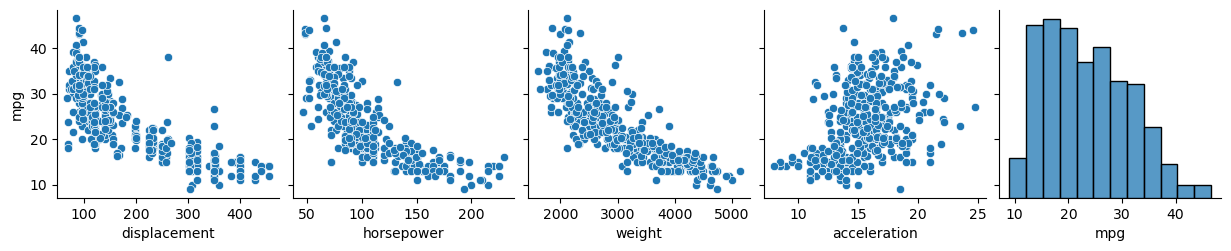

In [14]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

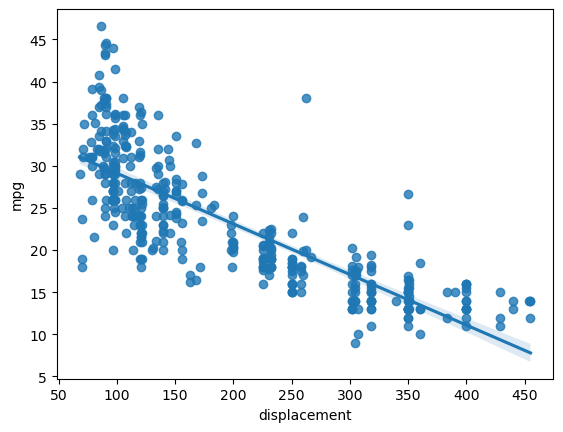

In [15]:
sns.regplot(x='displacement',y='mpg',data=df);

### Define Target Variable y and Feature X

In [16]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [17]:
y=df['mpg']

In [18]:
y.shape


(392,)

In [19]:
x=df[['displacement','horsepower','weight','acceleration']]

In [20]:
x.shape

(392, 4)

In [21]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


### Scaling Data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss=StandardScaler()

In [25]:
x=ss.fit_transform(x)

In [26]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [27]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


##### After Standardization Mean is Zero and Standard Deviation is One

### Train Test Split Data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=259)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

### Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
lr.intercept_

23.39413072264168

In [35]:
lr.coef_

array([-0.77351767, -2.05651335, -4.20767277, -0.68351632])

##### Mileage=23.4 - 1.05 Displacement - 1.68 Horsepower - 4.10 Weight - 0.115 Acceleration + Error

### Predict Test Data

In [36]:
y_pred=lr.predict(x_test)

In [37]:
y_pred

array([11.52691494, 31.50496647, 27.613151  , 27.16484935, 24.08723971,
       26.39141873, 20.08636205, 26.63471826, 19.531181  , 28.87888868,
       21.80129929, 15.12675149, 30.56019491, 29.22930535, 28.52335857,
       16.68584943, 31.30827024, 27.56698595, 29.13948525, 15.83636391,
       26.75180567, 10.47397103, 30.58449798, 29.92507645, 18.87499398,
       12.44530338,  7.86370218, 29.0581093 ,  9.03501711, 30.63290146,
       29.82918945, 12.48462505, 29.17427004, 21.12181243, 22.20430495,
       13.45264797, 26.55104433, 20.69953314, 18.78086079, 10.79146556,
       27.54889197, 22.17502721, 16.83303119, 23.73582587, 30.23058031,
       30.08728602, 30.98572028, 19.08002124, 15.33862627, 25.98325889,
       25.72633499, 27.92376965, 18.03764041, 10.88705184, 30.46974388,
       20.59370375, 24.12534936, 30.91995238, 19.60944144, 24.01407634,
       24.67605259, 28.42645079, 30.16381439, 31.68015679, 30.59744154,
       24.51623489, 23.62110135, 29.97401891, 30.06683116, 22.13

### Model Accuracy

In [38]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [39]:
mean_absolute_error(y_test,y_pred)

3.4990774229468875

In [40]:
mean_absolute_percentage_error(y_test,y_pred)

0.14598954511800857

In [41]:
r2_score(y_test,y_pred)

0.6593095176921928

### Polynomial Regression

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [44]:
x_train2=poly.fit_transform(x_train)

In [45]:
x_test2=poly.fit_transform(x_test)

In [46]:
lr.fit(x_train2,y_train)

LinearRegression()

In [47]:
lr.intercept_

21.143091294420643

In [48]:
lr.coef_

array([-1.81084965, -4.80086047, -2.39535815, -1.17448642,  0.73080959,
        0.99271005,  0.17349271,  0.92030907, -0.88013495,  1.3355446 ])

In [49]:
y_pred_poly=lr.predict(x_test2)

### Model Accuracy

In [50]:
mean_absolute_error(y_test,y_pred_poly)

3.2732584181829902

In [51]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.1341699489226716

In [52]:
r2_score(y_test,y_pred_poly)

0.70586180603836